# Grocery Store DataSet

**Ref: https://www.kaggle.com/simgeerek/grocerystoredataset**

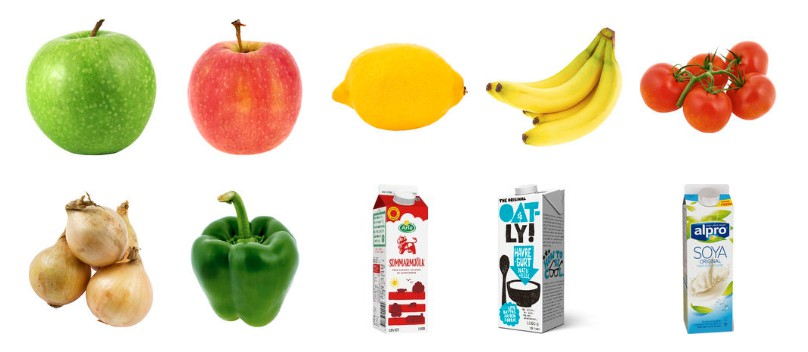

**Hints:**

* First of all, You must find frequent pattern with **apriori or FPgrowth** & then use Association rules on it

* Frequent Pattern have no precedence or priority but Association Rules have a "if >> then" method

* Frequent Pattern have Support parameter & Association Rules have some parameters such as: lift, confidence and ...



In [1]:
import pandas as pd
import numpy as np

In [2]:
# !pip install mlxtend==0.17.0

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df = pd.read_csv("C:/GroceryStoreDataSet.csv")
df

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [ ]:
# lambda , split

In [5]:
df = pd.read_csv("C:/GroceryStoreDataSet.csv", names=['products'])
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


# Step by Step

In [6]:
df = list(df["products"].apply(lambda x:x.split(',')))
df

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [7]:
te = TransactionEncoder()
te_data = te.fit(df).transform(df)


df = pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [6]:
data = list(df["products"].apply(lambda x:x.split(',')))

# from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

df = pd.DataFrame(te_data,columns=te.columns_).astype(int)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


# Apriori

In [7]:
df1 = apriori(df,min_support=0.01,use_colnames=True,verbose = 1)
df1.sort_values("support", ascending = False)

Processing 30 combinations | Sampling itemset size 5


,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
...,...,...
55,0.05,"(CORNFLAKES, MILK, BISCUIT)"
57,0.05,"(BOURNVITA, BREAD, SUGER)"
17,0.05,"(SUGER, BISCUIT)"
37,0.05,"(MAGGI, CORNFLAKES)"


* min_support=0.35 means that BISCUIT was in 35% of the rows.

# Route 2 for Frequent Table

In [8]:
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [30]:
xx = apriori(df, min_support=0.1, use_colnames=True, max_len=3)


xx['length'] = xx['itemsets'].apply(len)
xx.iloc[:20]


#xx['length'] = xx['itemsets'].apply(lambda x:len(x))

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
5,0.30,(CORNFLAKES),1
6,0.10,(JAM),1
7,0.25,(MAGGI),1
8,0.25,(MILK),1
9,0.30,(SUGER),1


In [19]:
fpgrowth(df, min_support=0.2, use_colnames=True, max_len=4)

,support,itemsets
0,0.65,(BREAD)
1,0.35,(BISCUIT)
2,0.25,(MILK)
3,0.30,(CORNFLAKES)
4,0.35,(TEA)
5,0.20,(BOURNVITA)
6,0.25,(MAGGI)
7,0.40,(COFFEE)
8,0.30,(SUGER)
9,0.20,"(BREAD, BISCUIT)"


* in 20% BREAD & TEA were seen together

# Association Rules

* association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.


* some Rules have a **low support and high confidence** for example: tea, jam >> bread

* generally, have a low support (low seen in the data) but that was valuable! cause anywhere you see "tea & jam", your result is tendency to bread (high confidence)


* other example: soccer analytics

In [29]:
# min thresh of confidence
rules = association_rules(xx, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667
1,(COCK),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950000
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000
3,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000
4,(BOURNVITA),(SUGER),0.20,0.30,0.10,0.500000,1.666667,0.0400,1.400000
...,...,...,...,...,...,...,...,...,...
61,"(COCK, BISCUIT)","(COFFEE, CORNFLAKES)",0.10,0.20,0.10,1.000000,5.000000,0.0800,inf
62,"(COFFEE, CORNFLAKES)","(COCK, BISCUIT)",0.20,0.10,0.10,0.500000,5.000000,0.0800,1.800000
63,"(BISCUIT, CORNFLAKES)","(COCK, COFFEE)",0.15,0.15,0.10,0.666667,4.444444,0.0775,2.550000
64,"(COFFEE, BISCUIT)","(COCK, CORNFLAKES)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf


* if we have the rules that capture a lower support with high confidence: it is really valuable, cause the frequency is min but rule take done by customer 